<H1>Lab3</H1>

In [5]:
import pandas as pd
import numpy as np

Программа позволяет рассчитать Gini index в UK. Gini index -- это показатель неравенства доходов, который широко используется для оценки распределения доходов внутри страны. Индекс варьируется от 0 до 1, где 0 означает полное равенство, а 1 — полное неравенство, когда весь доход сосредоточен в руках одного человека или группы. Неравенство доходов является ключевой проблемой экономического развития и имеет важные последствия для социальной и политической стабильности.

In [6]:
df = pd.read_csv("archive/gini_by_country.csv")

In [7]:
df

,country_code,country_name,year,value
0,AGO,Angola,2000,52.0
1,AGO,Angola,2008,42.7
2,AGO,Angola,2018,51.3
3,ALB,Albania,1996,27.0
4,ALB,Albania,2002,31.7
...,...,...,...,...
1891,ZMB,Zambia,2010,55.6
1892,ZMB,Zambia,2015,57.1
1893,ZWE,Zimbabwe,2011,43.2
1894,ZWE,Zimbabwe,2017,44.3


In [8]:
ukDF = df[df["country_name"]== "United Kingdom"]

Удалим все ненужные строки, оставим лишь Gini index и год

In [9]:
ukDF = ukDF.drop(columns=['country_code', 'country_name'])

<Axes: xlabel='year'>

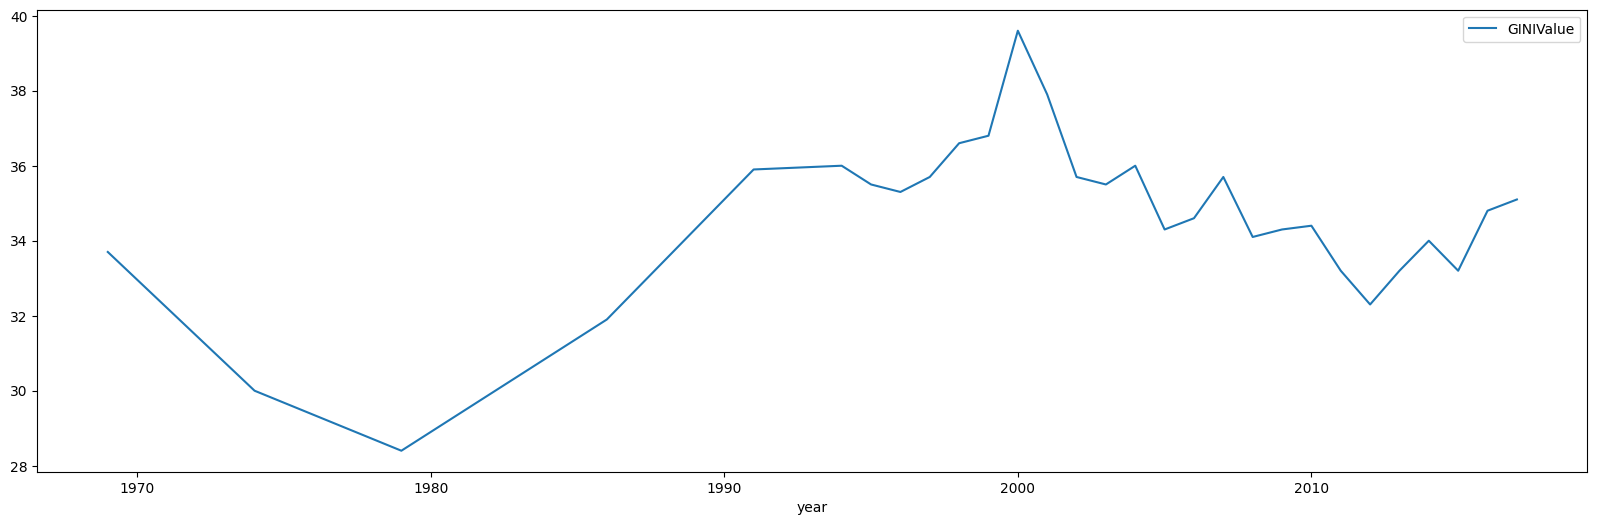

In [10]:
ukDF = ukDF.rename(columns={'value': 'GINIValue'})
ukDF.plot(x='year', y='GINIValue', figsize = (20, 6))

Перед обучением разделим данные на тестовые и тренировочные:

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [12]:
X_train, X_test, y_train, y_test = train_test_split(ukDF['year'], ukDF['GINIValue'], test_size=0.2,
                                                    random_state=42)
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

In [13]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

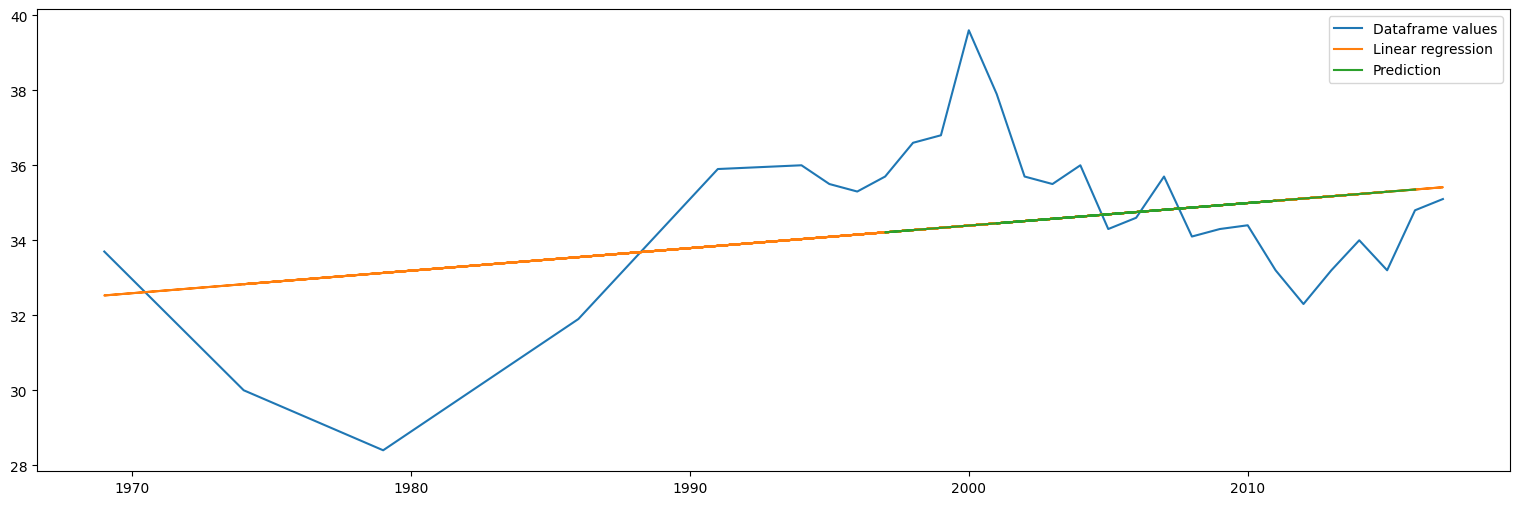

In [14]:
import matplotlib.pyplot as plt
figure, ax = plt.subplots(figsize = (19, 6))
ax.plot(ukDF['year'], ukDF['GINIValue'], label='Dataframe values')
ax.plot(X_train, model.predict(X_train), label='Linear regression')
ax.plot(X_test, model.predict(X_test), label='Prediction')
ax.legend()
plt.show()

Посчитаем метрики MAE и MSE

In [15]:
from sklearn.metrics import mean_absolute_error

print("MAE = %s" % mean_absolute_error(
    model.predict(X_test), y_test)
)

MAE = 1.6773327558432882


In [16]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error( model.predict(X_test), y_test)

print('MSE = %s' % mse)

MSE = 3.902910710944188


<H1>Lab4</H1>

In [30]:
from catboost import CatBoostRegressor

In [31]:
catModel = CatBoostRegressor(iterations=2500,  # Количество итераций
                          learning_rate=0.1,  # Скорость обучения
                          depth=6,  # Глубина дерева
                          random_state=345)  # Задаем случайное начальное состояние для воспроизводимости

catModel.fit(X_train, y_train, verbose=100)


y_pred = catModel.predict(X_test)



0:	learn: 2.1715084	total: 315us	remaining: 788ms
100:	learn: 0.4503008	total: 17.3ms	remaining: 412ms
200:	learn: 0.2068157	total: 34.4ms	remaining: 394ms
300:	learn: 0.0957252	total: 53.2ms	remaining: 389ms
400:	learn: 0.0478886	total: 72.1ms	remaining: 377ms
500:	learn: 0.0232450	total: 90.6ms	remaining: 361ms
600:	learn: 0.0103604	total: 110ms	remaining: 348ms
700:	learn: 0.0045173	total: 135ms	remaining: 346ms
800:	learn: 0.0020012	total: 154ms	remaining: 327ms
900:	learn: 0.0009326	total: 173ms	remaining: 308ms
1000:	learn: 0.0004120	total: 190ms	remaining: 285ms
1100:	learn: 0.0001841	total: 208ms	remaining: 265ms
1200:	learn: 0.0000924	total: 227ms	remaining: 246ms
1300:	learn: 0.0000449	total: 246ms	remaining: 227ms
1400:	learn: 0.0000223	total: 265ms	remaining: 208ms
1500:	learn: 0.0000114	total: 284ms	remaining: 189ms
1600:	learn: 0.0000057	total: 301ms	remaining: 169ms
1700:	learn: 0.0000028	total: 320ms	remaining: 150ms
1800:	learn: 0.0000015	total: 338ms	remaining: 131ms


In [32]:
mse = mean_squared_error(y_pred, y_test)

print('MSE = %s' % mse)

MSE = 1.6633326975699747


In [33]:
print("MAE = %s" % mean_absolute_error(
    y_pred, y_test)
)

MAE = 1.1333331966535443


In [34]:
import lightgbm as lgb

In [35]:
lightBmModel = lgb.LGBMRegressor(num_leaves=31,  # Количество листьев в дереве
                          learning_rate=0.1,  # Скорость обучения
                          n_estimators=100,  # Количество деревьев
                          random_state=42)  # Задаем случайное начальное состояние для воспроизводимости
lightBmModel.fit(X_train, y_train, verbose=10)  # Обучение модели с выводом прогресса на каждой 10-й итерации

# Прогнозирование на тестовом наборе данных
y_pred = lightBmModel.predict(X_test)



D:\Paul\Programming\Python\MiniConda\envs\py38\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


In [36]:
mse = mean_squared_error(y_pred, y_test)

print('MSE = %s' % mse)

MSE = 3.3983336031264373


In [37]:
print("MAE = %s" % mean_absolute_error(
    y_pred, y_test)
)

MAE = 1.450000044228375


<h1>Как видно, по результатам сравнения LightBm и CatBoost, CatBoost показывает себя лучше на нашей выборке данных. Сравним теперь CatBoost и xgboost</h1>

In [41]:
import xgboost as xgb
# Создание объекта DMatrix для обучающей и тестовой выборок
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Определение параметров модели
params = {
    'booster': 'gbtree',
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'max_depth': 3,
    'eta': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'alpha': 0.1,
    'lambda': 0.1,
    'min_child_weight': 1,
    'seed': 42
}

# Обучение модели XGBoost
num_rounds = 100
xgbModel = xgb.train(params, dtrain, num_rounds)

# Прогнозирование на тестовой выборке
y_pred = xgbModel.predict(dtest)

mse = mean_squared_error(y_pred, y_test)

print('MSE = %s' % mse)

MSE = 0.6971281217122068


In [42]:
print("MAE = %s" % mean_absolute_error(
    y_pred, y_test)
)

MAE = 0.6683339436848973


<h1>Итог: на выбранном датасете xgboost показал лучший результат. Затем идет CatBoost и потом lightgbm</h1>